In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('./metro_data.csv',encoding='cp949')
data = raw_data.copy()
data

In [ ]:
columns_dic = {'04시-05시 승차인원' : '04-05_rd', '04시-05시 하차인원': '04-05_qt', '05시-06시 승차인원' : '05-06_rd',
       '05시-06시 하차인원' : '05-06_qt', '06시-07시 승차인원' : '06-07_rd', '06시-07시 하차인원' : '06-07_qt', '07시-08시 승차인원' : '07-08_rd',
       '07시-08시 하차인원' : '07-08_qt', '08시-09시 승차인원' : '08-09_rd', '08시-09시 하차인원' : '08-09_qt', '09시-10시 승차인원' : '09-10_rd',
       '09시-10시 하차인원' : '09-10_qt', '10시-11시 승차인원' : '10-11_rd', '10시-11시 하차인원' : '10-11_qt', '11시-12시 승차인원' : '11-12_rd',
       '11시-12시 하차인원' : '11-12_qt', '12시-13시 승차인원' : '12-13_rd', '12시-13시 하차인원' : '12-13_qt', '13시-14시 승차인원' : '13-14_rd',
       '13시-14시 하차인원' : '13-14_qt', '14시-15시 승차인원' : '14-15_rd', '14시-15시 하차인원' : '14-15_qt', '15시-16시 승차인원' : '15-16_rd',
       '15시-16시 하차인원' : '15-16_qt', '16시-17시 승차인원' : '16-17_rd', '16시-17시 하차인원' : '16-17_qt', '17시-18시 승차인원' : '17-18_rd',
       '17시-18시 하차인원' : '17-18_qt', '18시-19시 승차인원' : '18-19_rd', '18시-19시 하차인원' : '18-19_qt', '19시-20시 승차인원' : '19-20_rd',
       '19시-20시 하차인원' : '19-20_qt', '20시-21시 승차인원' : '20-21_rd', '20시-21시 하차인원' : '20-21_qt', '21시-22시 승차인원' : '21-22_rd',
       '21시-22시 하차인원' : '21-22_qt', '22시-23시 승차인원' : '22-23_rd', '22시-23시 하차인원' : '22-23_qt', '23시-24시 승차인원' : '23-24_rd',
       '23시-24시 하차인원' : '23-24_qt', '00시-01시 승차인원' : '00-01_rd', '00시-01시 하차인원' : '00-01_qt', '01시-02시 승차인원' : '01-02_rd',
       '01시-02시 하차인원' : '01-02_qt', '02시-03시 승차인원' : '02-03_rd', '02시-03시 하차인원' : '02-03_qt', '03시-04시 승차인원' : '03-04_rd',
       '03시-04시 하차인원' : '03-04_qt'}
data.columns.unique()


In [ ]:
data = data.rename(columns=columns_dic)

In [ ]:
data.query('호선명 == "2호선"')['지하철역'].unique()

In [ ]:
data_euljiro = data.query('지하철역 == "을지로3가"')

In [ ]:
data_euljiro = data_euljiro.groupby(['사용월']).sum()
data_euljiro = data_euljiro.iloc[84:,:].drop(columns='작업일자')
data_euljiro.describe()

In [11]:
data2 = pd.read_csv('./metro_day.csv', encoding= 'cp949')

In [ ]:
data2.info()

In [ ]:
data2.head()

In [ ]:
data2_euljiro  = data2.query('역명 == "을지로3가" and 호선명 == "2호선"').drop(columns='등록일자')

data2_euljiro['사용일자'] = pd.to_datetime(data2_euljiro['사용일자'], format = '%Y%m%d')
data2_euljiro.head(10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize = (20,5))
sns.countplot(x = data2['호선명'])


In [ ]:
data_euljiro

In [ ]:
data2_euljiro

In [ ]:
sns.barplot(data2_euljiro, x = '사용일자', y = '하차총승객수')
sns.barplot(data2_euljiro, x = '사용일자', y = '승차총승객수')

In [ ]:
data_euljiro.head()

In [ ]:
data2_euljiro.describe()

In [ ]:

data2_euljiro['차이'] = data2_euljiro['승차총승객수']- data2_euljiro['하차총승객수']
data2_euljiro
d = data2_euljiro.set_index('사용일자')

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize = (20,5))
sns.lineplot(d['차이'])

In [ ]:
a = data2.drop(columns = ['사용일자', '등록일자']).query('호선명 == "2호선"').groupby('역명').mean().sort_values(by = '승차총승객수', ascending= False)

In [ ]:
a

In [ ]:

data2.info()

In [ ]:
data2 = data2.drop(columns='등록일자')

In [2]:
data2['사용일자'] = pd.to_datetime(data2['사용일자'], format='%Y%m%d')

NameError: name 'data2' is not defined

In [ ]:
import folium
map = folium.Map(location = [37.529622, 126.984307], zoom_start = 11, width = 900, height= 500)
folium.Marker(
    location = [37.566299,126.992616],
    popup = '을지로3가역',
    icon = folium.Icon(color = 'blue', icon = 'star')
).add_to(map)

folium.CircleMarker(
    location = [37.566299,126.992616],
    radius = 5,
    color = '#7286D3',
).add_to(map)

In [ ]:
##지하철 좌표 추출하는 코드

#def get_metro_location(line, metro_st):
    

In [ ]:
list_data = data2.reset_index()
list_data


In [ ]:
list_data['승차총승객수'].to_list()

In [ ]:
ake = data['사용월']

In [ ]:
c = ake.tolist()
pd.DataFrame({'큰솔':c})

In [ ]:
import json
import requests
api_key = 'b88f8e5816601d3d45cd9a51032862f9'

In [ ]:
class catch_address():
    
    def addr_to_lat_long(addr):
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
        headers = {"Authorization": "KakaoAK " + api_key}
        result = json.loads(str(requests.get(url, headers=headers).text))
        match_first = result['documents'][0]['address']
        return float(match_first['x']), float(match_first['y'])
    
    def addr_lat(addr):
        a3 = catch_address.addr_to_lat_long(addr)
        a3_list = list(a3)
        return a3_list[0]
    
    def addr_long(addr):
        a3 = catch_address.addr_to_lat_long(addr)
        a3_list = list(a3)
        return a3_list[1]
    


In [ ]:
print(catch_address.addr_lat('명동'), catch_address.addr_long('명동'))

In [ ]:
b = list()
addr = pd.DataFrame()

In [ ]:

c = ['명동','을지로3가','종로']
for i in c:
    b.append(catch_address.addr_lat(i))
b
addr = pd.DataFrame({'위치' : b})
addr

In [ ]:
catch_address.addr_lat('서울특별시 중구 소공로 36-10'),catch_address.addr_long('서울특별시 중구 소공로 36-10')

In [ ]:
url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address='명동')
headers = {"Authorization": "KakaoAK " + api_key}
result = json.loads(str(requests.get(url, headers=headers).text))
match_first = result['documents'][0]['address']
match_first

In [ ]:
data3 = pd.read_csv('./서울교통공사_1_8호선 역사 좌표(위경도) 정보_20211231.csv', encoding='cp949')

In [ ]:
data3

In [ ]:
data2 = pd.read_csv('./metro_day.csv', encoding= 'cp949')
data2

In [ ]:

data2['테스트문장'] = np.NAN

In [ ]:
data2

In [ ]:
data2['테스트문장2'] = np.NAN

In [ ]:
data2['테스트문장'] = data2['역명']

In [ ]:
#딕셔너리화
d3 = {}
for i in range(276):
    d1 = {data3['역명'][i]:data3['경도'][i]}
    d3.update(d1)
    

In [ ]:
d3

In [ ]:


data2['테스트문장2'].replace(d3)

In [ ]:
data2['역명'].replace(d3)

In [13]:
import seaborn as sns

data2['사용일자'] = pd.to_datetime(data2['사용일자'], format = '%Y%m%d')


<AxesSubplot: xlabel='사용일자', ylabel='승차총승객수'>

/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/Users/imbot/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Gly

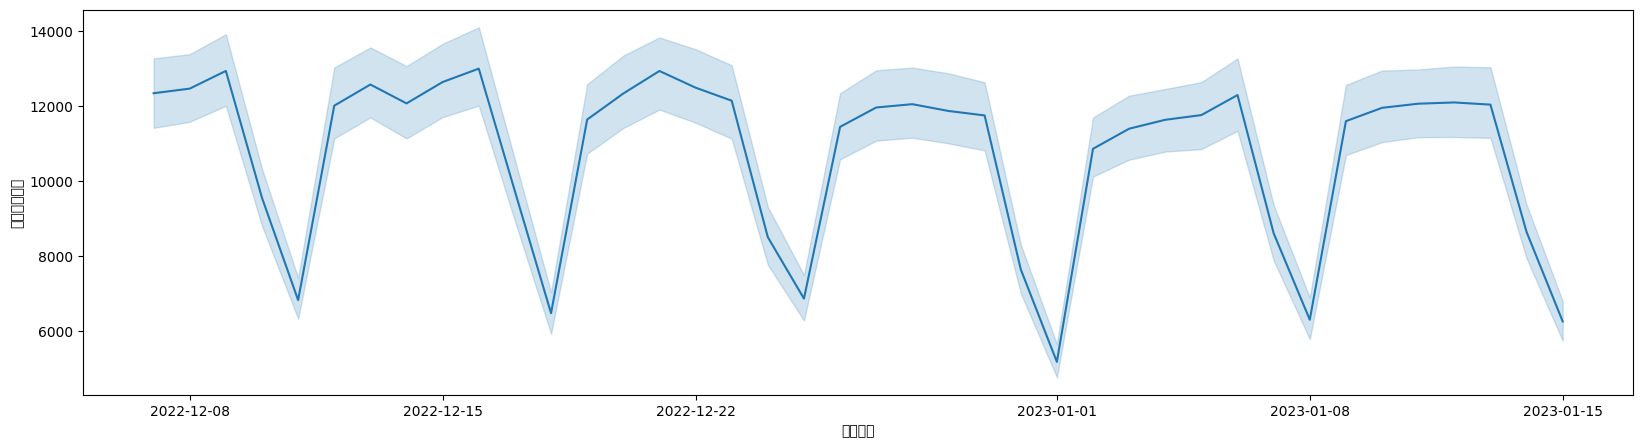

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = [20,5])
sns.lineplot(x = data2['사용일자'], y = data2['승차총승객수'])
